# Data Analysis Interview Challenge

__Part 1 ‐ Exploratory data analysis__
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­ minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

__Part 2 ‐ Experiment and metrics design__
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two ­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    - how you will implement the experiment
    - what statistical test(s) you will conduct to verify the significance of the observation
    - how you would interpret the results and provide recommendations to the city operations team along with any caveats.

__Part 3 ‐ Predictive modeling__
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).


__Data description__

- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYY MM DD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

## Part 1

In [70]:
import pandas as pd
import numpy as np
import json

In [71]:
data_log = pd.read_json("logins.json")
data_log.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [72]:
data_log.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [73]:
data_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [74]:
data_log['count'] = 1
data_log.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [75]:
data_log = data_log.sort_values(by=['login_time'])
data_log.head()

,login_time,count
6,1970-01-01 20:12:16,1
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
3,1970-01-01 20:16:36,1
2,1970-01-01 20:16:37,1


In [76]:
agg_data = data_log.rolling('15min',on='login_time').sum()
agg_data = agg_data.set_index(keys='login_time')

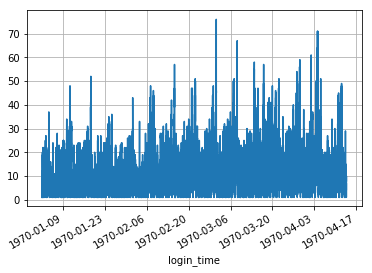

In [77]:
agg_data["count"].plot(grid = True)

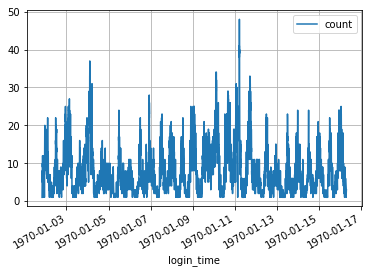

In [78]:
agg_data.iloc[:10000,:].plot(grid = True)

As we see from the line chart, there is some repetitive pattern (up and down) over time. However, by choosing 15 minutes interval, we couldn't see it clearly. Let's change to 3 days 

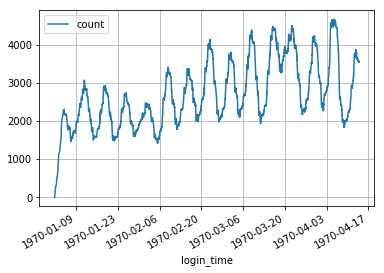

In [79]:
agg_data = data_log.rolling('3d',on='login_time').sum()
agg_data = agg_data.set_index(keys='login_time')
agg_data.plot(grid = True)

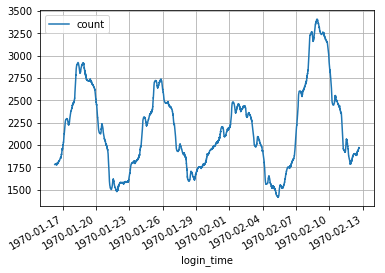

In [80]:
agg_data.iloc[10000:30000,:].plot(grid = True)

By changing the cycle to 3 days, we could see the pattern more clearly. It seems the user is active in 3 days following by 3 days not so active.

## Part 2

Experiment and metrics design The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two ­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

__Answer:__ We would choose the number of vehicles travelling between the bridge to measure the success of this experiment.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    - how you will implement the experiment
    
    __Answer:__ We would measure the number of vehicles travelling in 14 weekdays before conducting the experiement and then do the same after the experiment. Then, we would take the mean of the metric and compare them together. If the difference is significant we could say the experiment is successful.
    
    - what statistical test(s) you will conduct to verify the significance of the observation
    
    __Answer:__ We would take the difference between two sample and take one sample t-test to verify whether the difference between mean of two samples are signifcant. Null hypothesis, mean of difference value = 0, alternative hypothesis: mean value not equal 0, we could only take one-side to see whether the mean < or > than 0. If the p-value is small we can reject the nulll hypothesis.
    
    - how you would interpret the results and provide recommendations to the city operations team along with any caveats.
    
    __Answer:__ If we see there is no significant difference between two samples, we could say the experiment is a failure and recommend them to try other experiments. If we see the difference is negative, it means the experimemt actually make the situation worse. If we see the difference is positive, we could say the experiment is successful.

## Part 3

__Part 3 ‐ Predictive modeling__
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).


__Data description__

- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYY MM DD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

In [81]:
with open("ultimate_data_challenge.json") as f:
    data = json.load(f)

data_ultimate = pd.DataFrame(data)
data_ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [82]:
data_ultimate.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [83]:
data_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


__Part 1:__ Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

__Preprocessing__

In [84]:
# Convert to datetime object
data_ultimate['last_trip_date'] = pd.to_datetime(data_ultimate['last_trip_date'])
data_ultimate['signup_date'] = pd.to_datetime(data_ultimate['signup_date'])

In [85]:
# Convert catergory into numeric value
phone_dict = {k:v for k,v in zip(data_ultimate['phone'].unique(),[1,2,0])}
phone_dict

{'iPhone': 1, 'Android': 2, None: 0}

In [86]:
data_ultimate['phone'] = data_ultimate['phone'].apply(lambda x: phone_dict.get(x))
data_ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,1,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,2,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,1,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,1,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,2,2014-01-27,11.8,14,False,82.4


In [101]:
# Fill NA value of rating to 0
data_ultimate = data_ultimate.fillna(0)
data_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null int64
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(1)
memory usage: 4.2+ MB


In [87]:
# Last day of data
last_day = max(data_ultimate['last_trip_date'])
last_day

Timestamp('2014-07-01 00:00:00')

In [88]:
first_day = min(data_ultimate['last_trip_date'])
first_day

Timestamp('2014-01-01 00:00:00')

In [89]:
from datetime import timedelta
offset_1month = timedelta(days=30)
june = last_day - offset_1month
june

Timestamp('2014-06-01 00:00:00')

__Fraction of active users__

In [189]:
active_user = data_ultimate['last_trip_date'].apply(lambda x: int(x > june))
active_user_pct = active_user.value_counts()
active_user_pct = active_user_pct / 50000
active_user_pct

0    0.6338
1    0.3662
Name: last_trip_date, dtype: float64

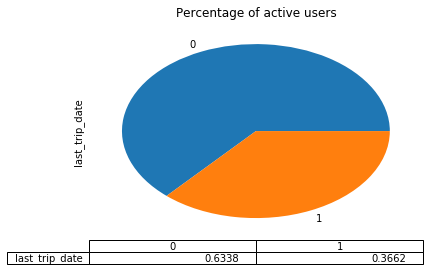

In [190]:
active_user_pct.plot.pie(title='Percentage of active users',table=True)

As we see from the pie chart the number of active users take 36.62% of number of users.

__Correlation Investigation__

Now let's see which factors correlate to number of active users

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt
def corr_matrix(df_truth):
    # Compute the correlation matrix
    corr = df_truth.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

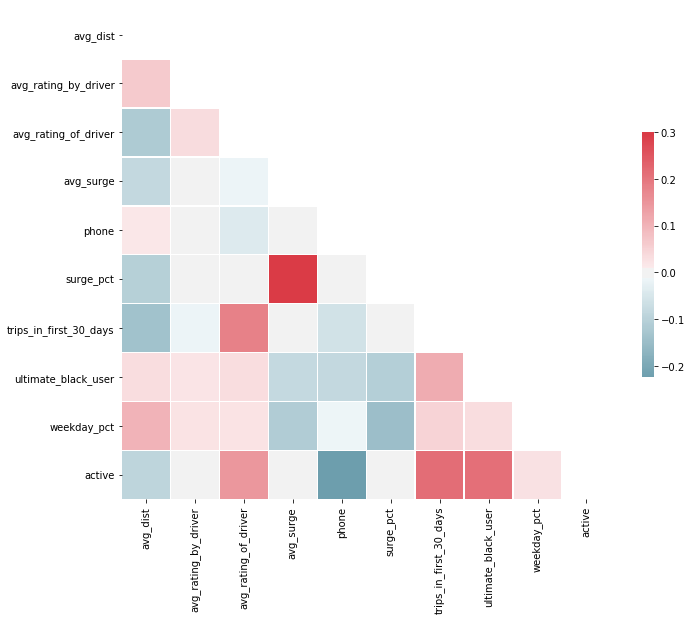

In [199]:
df_truth = x.copy()
df_truth['active'] = active_user
# df_truth.head()
corr_matrix(df_truth)

"Trips in first 30 days", "Ultimate Black user", "avg rating to drivers" are good indicators for active users in first 30 days. One interesting point is that type of phone of users can be a good indicator. Let's investigate this point. 

In [221]:
p_active = df_truth.loc[df_truth['active']==1,'phone']
# p_active.value_counts()

p_inactive = df_truth.loc[df_truth['active']==0,'phone']
# p_inactive.value_counts()

df_phone = pd.DataFrame({'active':p_active.value_counts(),'inactive':p_inactive.value_counts()})

phone_dict_num = {k:v for v,k in phone_dict.items()}
phone_dict_num[0] = 'Other'
df_phone.index = [phone_dict_num.get(i) for i in df_phone.index]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cd2c3fac8>,
      dtype=object)

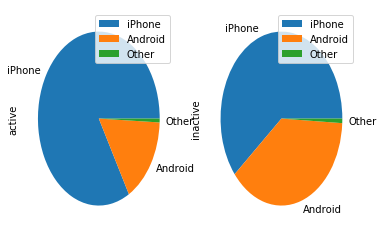

In [224]:
df_phone.plot.pie(subplots=True)

What we can see from here is although we couldn't conclude anything about whether users who use iphone would be active users or not, we can say if a user using an Android Phone, it is more likely that he/she won't be an active user.

In [102]:
from sklearn.tree import DecisionTreeClassifier
x = data_ultimate.drop(columns=['city','last_trip_date','signup_date'])

In [150]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x,active_user)
feature_importance = list(zip(x.columns,clf.feature_importances_))
feature_importance = sorted(feature_importance, key= lambda row: row[1],reverse=True)
feature_importance
# sorted(student_tuples, key=lambda student: student[2])  

[('avg_dist', 0.35031018707743405),
 ('avg_rating_by_driver', 0.18670662699526),
 ('weekday_pct', 0.11726889287033392),
 ('avg_rating_of_driver', 0.08954048791397434),
 ('surge_pct', 0.07590175531711249),
 ('trips_in_first_30_days', 0.07053646572199475),
 ('phone', 0.04463755829181593),
 ('avg_surge', 0.0414150213443218),
 ('ultimate_black_user', 0.023683004467752712)]

In [192]:
from sklearn.feature_selection import f_classif
f_classif(x,active_user)

(array([4.10845103e+02, 2.17519360e+00, 1.10410598e+03, 6.36266162e-01,
        2.63509909e+03, 5.63066176e+00, 2.41674264e+03, 2.31258526e+03,
        3.49058491e+01]),
 array([5.57820385e-091, 1.40258162e-001, 1.73826742e-239, 4.25069905e-001,
        0.00000000e+000, 1.76527267e-002, 0.00000000e+000, 0.00000000e+000,
        3.48273499e-009]))

In [193]:
x.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'phone', 'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user',
       'weekday_pct'],
      dtype='object')

__Part 2:__ Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?Include any key indicators of model performance.

__Answer:__

I would choose Random Forest because this model is not only explanable but also strong in term of prediction, other alternatives are decision tree, gradient boosting tree. 

To evaluate the model I would choose F1 score as the metric of success, the higher the better. I would perform cross-validation to pick the best hyper-parameters and test it on test set.

In [229]:
def check6m(row):
    signup_date = row[0]
    lastdate = row[1]
    diff = lastdate - signup_date
    if (diff.days >= 30*5):
        return 1
    else:
        return 0

In [238]:
active_user_6m = data_ultimate[['signup_date','last_trip_date']].apply(check6m,axis=1)
y_6m = active_user_6m

__Split training / test set__

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y_6m, test_size=0.3, random_state=42)

__Fit a Random Forest with GridSearch for Hyper-parameter tuning__ 

In [240]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'max_depth':[3,5,7,10]}
rf = RandomForestClassifier(random_state=0)
rf_cv = GridSearchCV(rf, parameters, cv=5,scoring='f1')
rf_cv.fit(x_train, y_train)
f1_score(rf_cv.predict(x_test),y_test)

0.4827140549273022

__Fit a Decision Tree with GridSearch for Hyper-parameter tuning__

In [241]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':[3,5,7,10,15]}
dt = DecisionTreeClassifier()
dt_cv = GridSearchCV(dt, parameters, cv=5,scoring='f1')
dt_cv.fit(x_train, y_train)
y_pred = dt_cv.predict(x_test)
f1_score(y_pred,y_test)

0.49788519637462236

Data description

city: city this user signed up in
phone: primary device for this user
signup_date: date of account registration; in the form ‘YYYY MM DD’
last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
avg_dist: the average distance in miles per trip taken in the first 30 days after signup
avg_rating_by_driver: the rider’s average rating over all of their trips
avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
surge_pct: the percent of trips taken with surge multiplier > 1
avg_surge: The average surge multiplier over all of this user’s trips
trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
weekday_pct: the percent of the user’s trips occurring during a weekday

__Part 3:__ Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

From the decisition tree and correlation matrix, we can find out 
1. Active users in first 30 days tend to be active users in 6 month. Therefore, Ultimate should focus much more on first 30 days.
2. Again, Android users are less likely to be active users.
3. "Average Rating by Driver" (average rating of rider on their trips) play a key part in the model. So the drivers should give their riders best experience.
4. 'surge_pct' ( the percent of trips taken with surge multiplier > 1) is also very important so Ultimate probably should do A/B testing for this feature to improve its rider retention.

In [242]:
dt_best = dt_cv.best_estimator_
dt_best.fit(x,y_6m)

feature_importance = list(zip(x.columns,dt_best.feature_importances_))
feature_importance = sorted(feature_importance, key= lambda row: row[1],reverse=True)
feature_importance

[('avg_rating_by_driver', 0.3240237101809982),
 ('surge_pct', 0.24690000163191886),
 ('weekday_pct', 0.09823922132129712),
 ('avg_dist', 0.0831205887734095),
 ('phone', 0.07161713657357534),
 ('avg_surge', 0.04902100416228309),
 ('trips_in_first_30_days', 0.04869635713236559),
 ('ultimate_black_user', 0.04570631409657395),
 ('avg_rating_of_driver', 0.032675666127578405)]

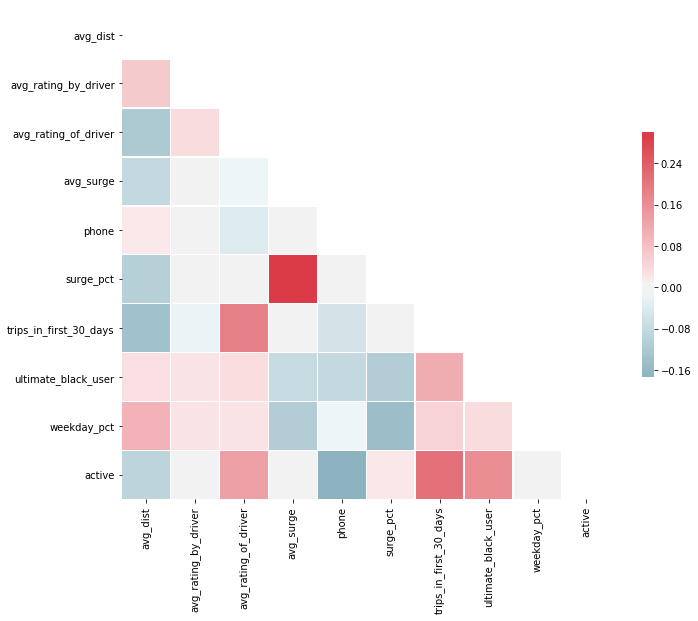

In [243]:
df_truth = x.copy()
df_truth['active'] = y_6m
corr_matrix(df_truth)
# df_truth.head()